## Fashion Dataset: 

you can download the dataset from this link: 
    https://www.kaggle.com/zalando-research/fashionmnist#fashion-mnist_train.csv

Given:
- There are two CSV files, one for training and the other for testing. 
- Shape of training set is 60000 x 785 (Image size 28*28 + 1 point for label)
- shape of testing set is 10000 x 785

Target: 
- classify the input image into 10 classes: 
- labels are: 0 T-shirt/top 1 Trouser 2 Pullover 3 Dress 4 Coat 5 Sandal 6 Shirt 7 Sneaker 8 Bag 9 Ankle boot

Answer:

This notebook will handle this problem with:
- KNN from sklearn (WARNING: IT IS COMPUTATIONALLY INTENSIVE) 
- Deep Neural Network from Keras

## Import required liberaries: 

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
%matplotlib inline

## read files:

In [2]:
training_set = pd.read_csv('fashion-mnist_train.csv')
testing_set = pd.read_csv('fashion-mnist_test.csv')

## EDA

In [3]:
# let's check the header and index of the data
training_set.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
testing_set.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


So the first column is the labels, and the rest of the columns are the pixels of the images. 

In [5]:
training_set.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.00000
mean,4.500000,0.000900,0.006150,0.035333,0.101933,0.247967,0.411467,0.805767,2.198283,5.682000,...,34.625400,23.300683,16.588267,17.869433,22.814817,17.911483,8.520633,2.753300,0.855517,0.07025
std,2.872305,0.094689,0.271011,1.222324,2.452871,4.306912,5.836188,8.215169,14.093378,23.819481,...,57.545242,48.854427,41.979611,43.966032,51.830477,45.149388,29.614859,17.397652,9.356960,2.12587
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,4.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,58.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,9.000000,16.000000,36.000000,226.000000,164.000000,227.000000,230.000000,224.000000,255.000000,254.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,170.00000


There is no missing values here, the maximum value for each pixel is 255, and the minimum value is 0

let's display some examples: 

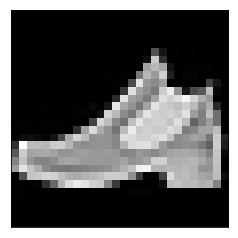

In [6]:
ex_1 = training_set.iloc[1,1:].values.reshape((28,28))
_ = plt.imshow(ex_1, cmap='gray')
_ = plt.xticks([])         # To remove the numbers on x axis
_ = plt.yticks([])

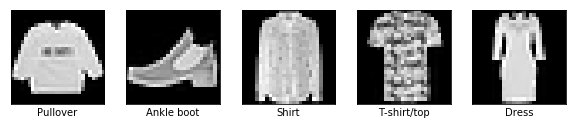

In [7]:
label_name = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(5,5,i+1)
    plt.grid(False)
    plt.xticks([])    # To remove the numbers on x axis
    plt.yticks([])
    plt.imshow(training_set.iloc[i,1:].values.reshape((28,28)), cmap='gray')
    plt.xlabel(label_name[training_set['label'][i]])

## Preprocessing

In this example, the range of data is between 0 and 255, It is a good practice to keep the range of the data between 0 and 1 or -1 and 1

We have two files one for training and the other for testing, So we don't need to split the data 

In [8]:
label = training_set['label']
pixels = training_set.iloc[:,1:]

label_test = testing_set['label']
pixels_test = testing_set.iloc[:,1:]

print(label.shape)
print(pixels.shape)
print(label_test.shape)
print(pixels_test.shape)

pixels /= 255.0
pixels_test /= 255.0

(60000,)
(60000, 784)
(10000,)
(10000, 784)


Check  the balance of the classes in the dataset

In [9]:
for i in label.unique():
    print('Number of data points of class {} is {}'.format(i, np.sum(label==i)))

Number of data points of class 2 is 6000
Number of data points of class 9 is 6000
Number of data points of class 6 is 6000
Number of data points of class 0 is 6000
Number of data points of class 3 is 6000
Number of data points of class 4 is 6000
Number of data points of class 5 is 6000
Number of data points of class 8 is 6000
Number of data points of class 7 is 6000
Number of data points of class 1 is 6000


That's great, we have a balance between the data poits for each class. 

## KNN

In [10]:
k = 3
model = KNeighborsClassifier(n_neighbors=k)
model.fit(pixels, label)

score = model.score(pixels_test, label_test)
print(score)
pred = model.predict(pixels_test)
print(classification_report(label_test, pred))

0.8584
             precision    recall  f1-score   support

          0       0.75      0.87      0.80      1000
          1       0.99      0.97      0.98      1000
          2       0.74      0.82      0.78      1000
          3       0.91      0.87      0.89      1000
          4       0.81      0.77      0.79      1000
          5       0.99      0.82      0.90      1000
          6       0.68      0.59      0.63      1000
          7       0.88      0.94      0.91      1000
          8       0.98      0.95      0.97      1000
          9       0.88      0.97      0.92      1000

avg / total       0.86      0.86      0.86     10000



### WARNING: THE NEXT CELL IS COMPUTATIONALLY INTENSIVE
now let's try different values of k and choose k which gives max accuracy on the test data

In [11]:
accuracy = [score]    # Keep the score of k = 3 
ks = [3]
for k in range(4,30,2):
    mdl = KNeighborsClassifier(n_neighbors=k)
    mdl.fit(pixels, label)

    # evaluate the model and update the accuracy list
    score = mdl.score(pixels_test, label_test)
    print(score)
    accuracy.append(score)
    ks.append(k)

# select k with higher accuracy on validation set
i = int(np.argmax(accuracy))   # we need integer as it will be used as index  
print("k= {} achieved highest accuracy of {} on validation data".format(ks[i], accuracy[i] * 100))

0.8618
0.8606
0.8571
0.8573
0.8553
0.855
0.8517
0.8497
0.8473
0.8452
0.8444
0.8429
0.842
k= 4 achieved highest accuracy of 86.18 on validation data


## Neural Networks:

In [14]:
y = to_categorical(label)        # Convert classes to one-hot-key 
mdl = Sequential()
mdl.add(Dense(64, activation = 'relu', input_shape = (pixels.shape[1], )))
mdl.add(Dense(64, activation = 'relu'))
mdl.add(Dense(y.shape[1], activation = 'softmax'))        # Output layer

monitor = EarlyStopping(monitor= 'val_loss', min_delta= 1e-3, patience = 5,verbose=1, mode = 'auto')

mdl.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
mdl.fit(pixels, y, validation_split = 0.3, epochs = 100,  callbacks=[monitor])

pred = mdl.predict(pixels_test)
pred = np.argmax(pred, axis = 1)    # Convert one-hot-key to classes
print(classification_report(label_test, pred))

Train on 42000 samples, validate on 18000 samples
Epoch 1/100
42000/42000 [==============================] - 6s 137us/step - loss: 0.5506 - acc: 0.8033 - val_loss: 0.4483 - val_acc: 0.8376
Epoch 2/100
42000/42000 [==============================] - 5s 131us/step - loss: 0.4021 - acc: 0.8550 - val_loss: 0.4254 - val_acc: 0.8423
Epoch 3/100
42000/42000 [==============================] - 5s 126us/step - loss: 0.3601 - acc: 0.8689 - val_loss: 0.4197 - val_acc: 0.8483
Epoch 4/100
42000/42000 [==============================] - 5s 124us/step - loss: 0.3356 - acc: 0.8765 - val_loss: 0.3887 - val_acc: 0.8583
Epoch 5/100
42000/42000 [==============================] - 5s 127us/step - loss: 0.3177 - acc: 0.8824 - val_loss: 0.3495 - val_acc: 0.8743
Epoch 6/100
42000/42000 [==============================] - 5s 131us/step - loss: 0.3025 - acc: 0.8885 - val_loss: 0.4111 - val_acc: 0.8551
Epoch 7/100
42000/42000 [==============================] - 5s 131us/step - loss: 0.2899 - acc: 0.8910 - val_loss: 0.

## Conclusion: 
- The accuracy of KNN method depends on k and within the range 1:30 the accuracy is 86% ± 2, in addition it is computationally intensive
- The accuracy of NN is higher around 92% and the computation is faster than KNN method. 

## PCA

I am trying to compress the high dimension pixels and plot the results. I will then apply KNN to classify the images based on less features. 

In [18]:
from sklearn.decomposition import PCA

mpca = PCA(n_components = 9)
mpca.fit(pixels)
compressed_data = mpca.transform(pixels)
compressed_test = mpca.transform(pixels_test)

In [19]:
compressed_data.shape

(60000, 9)

C:\Users\tamer\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\tamer\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
C:\Users\tamer\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\tamer\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


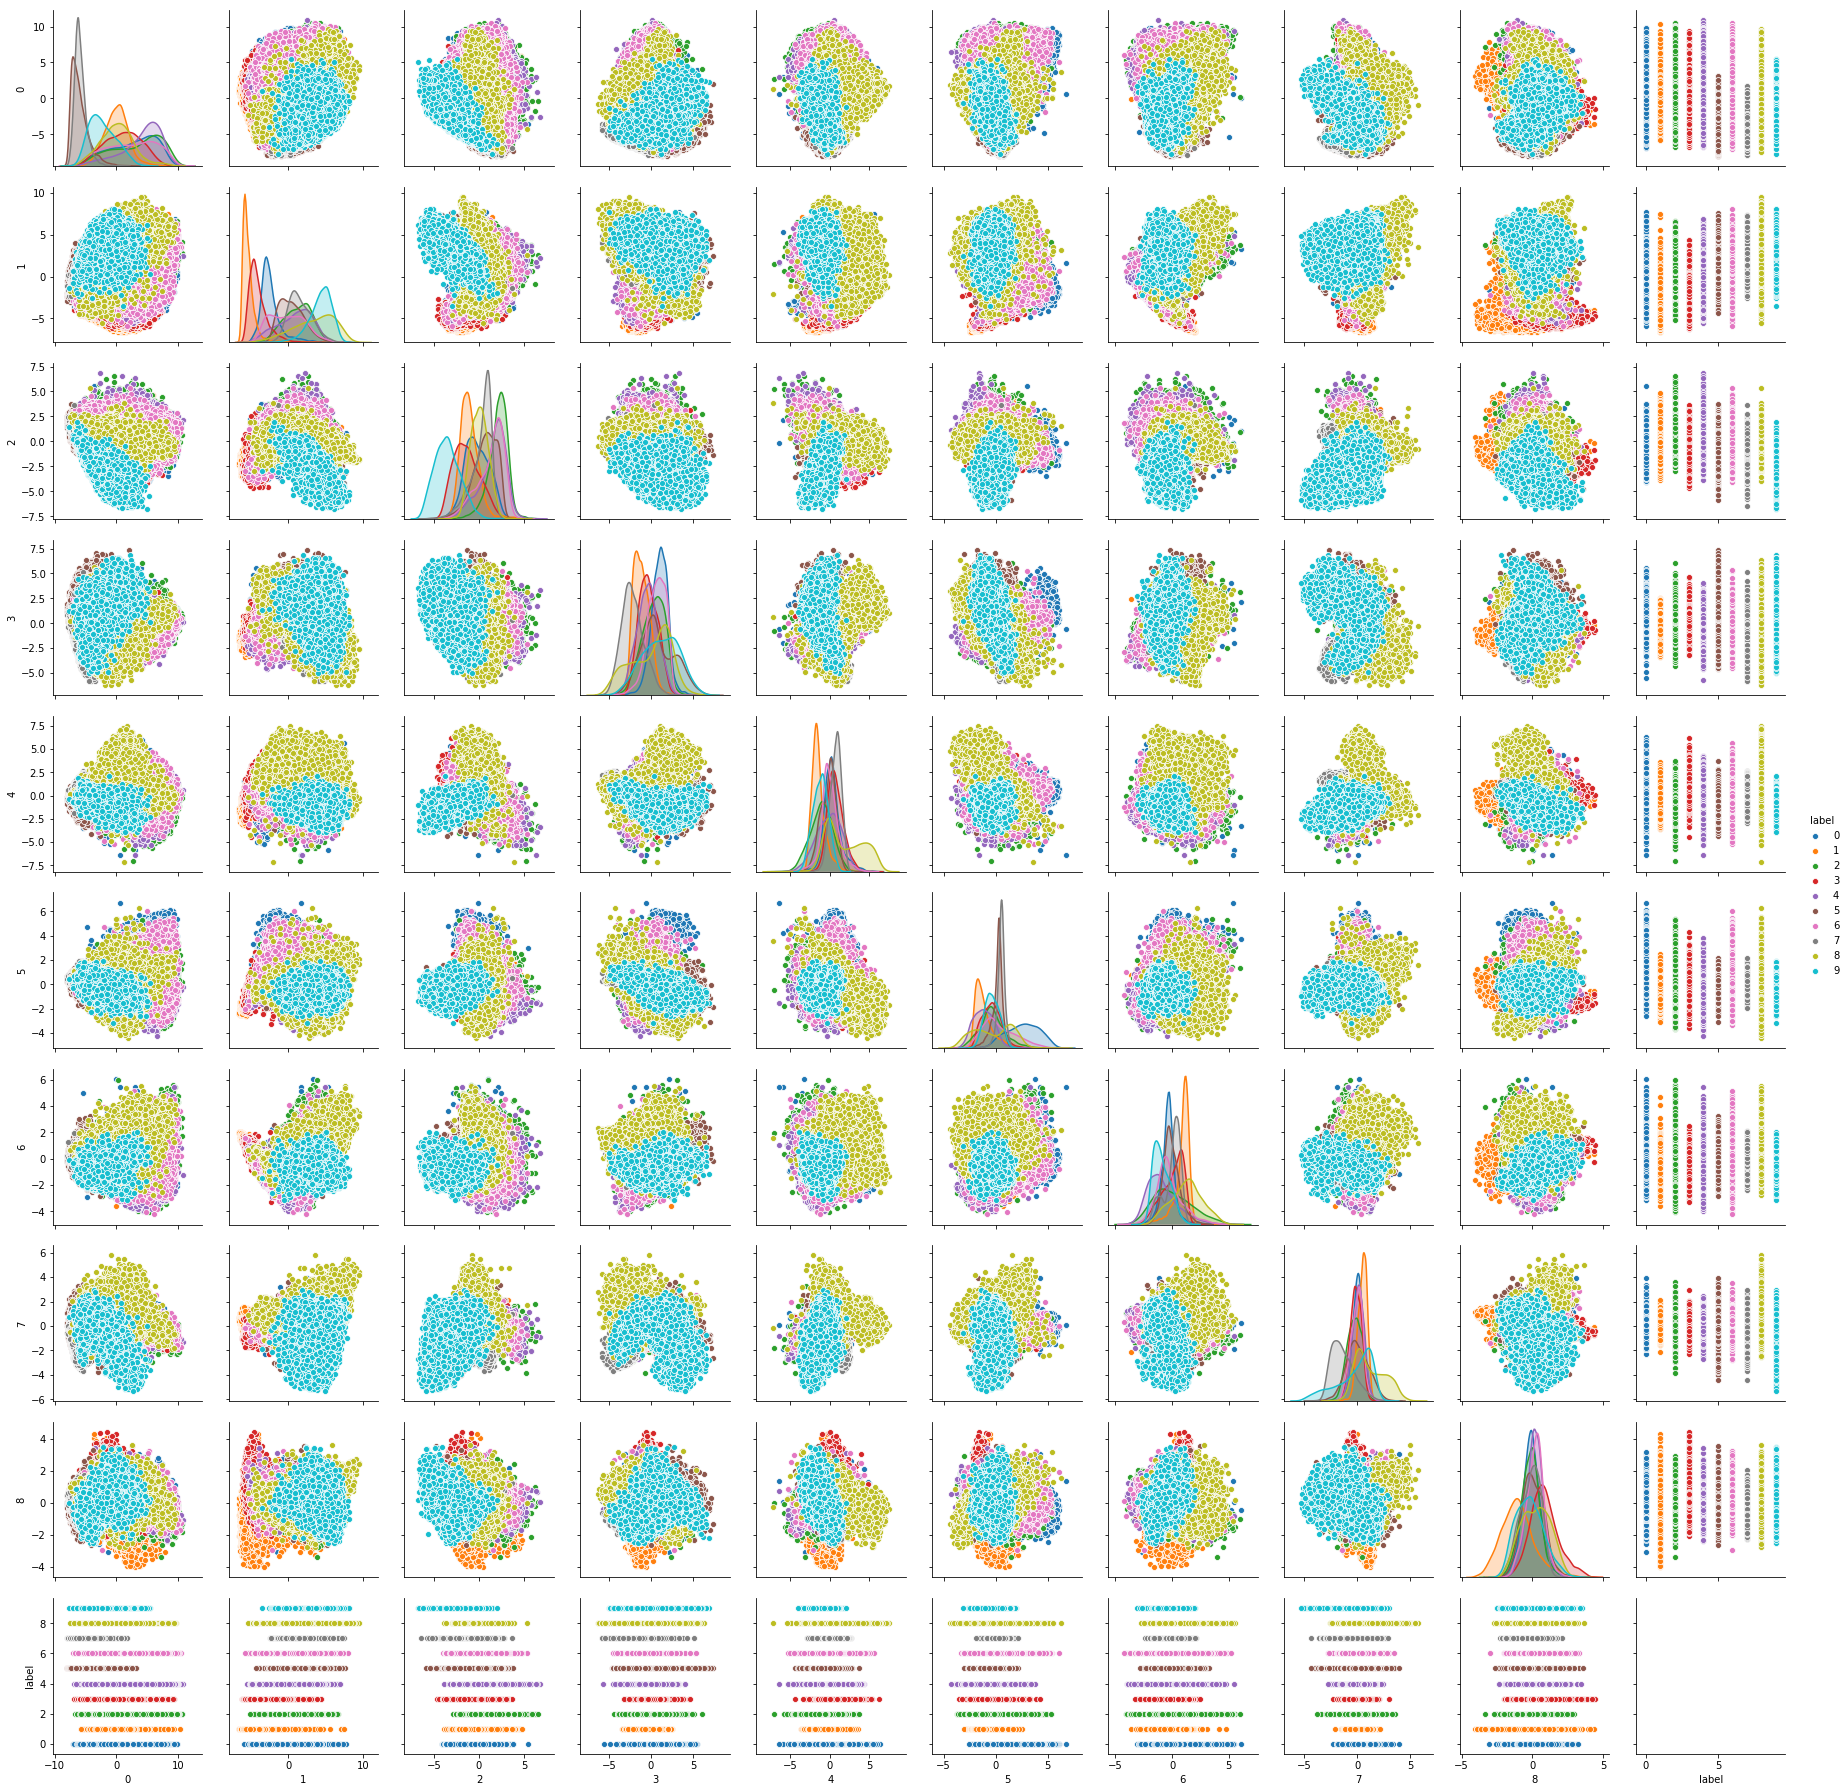

In [20]:
compressed = pd.DataFrame(compressed_data)
compressed['label'] = label
sns.pairplot(compressed, hue="label")

In [23]:
k = 4
model = KNeighborsClassifier(n_neighbors=k)
model.fit(compressed_data, label)

score = model.score(compressed_test, label_test)
print(score)
pred = model.predict(compressed_test)
print(classification_report(label_test, pred))

0.8011
             precision    recall  f1-score   support

          0       0.73      0.84      0.78      1000
          1       0.97      0.96      0.96      1000
          2       0.64      0.69      0.67      1000
          3       0.84      0.85      0.84      1000
          4       0.66      0.64      0.65      1000
          5       0.89      0.88      0.88      1000
          6       0.57      0.47      0.51      1000
          7       0.84      0.87      0.85      1000
          8       0.96      0.93      0.95      1000
          9       0.89      0.89      0.89      1000

avg / total       0.80      0.80      0.80     10000

